1. Import Dataset
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Preprocessing/Data Engineering
5. Model Building and Evaluating

### Importing the necessary libraries for data processing

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

## 1. Importing Data


In [2]:
df=pd.read_csv('Telecom_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Cleaning

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()  ##No missing value

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
dic={'dtype':[], 'num_uni':[],'uni_value':[],'uni_value_counts':[]}
for i in df.columns:
    dtype=df[i].dtype
    num_uni=df[i].nunique()
    uni_value=df[i].unique()
    uni_value_counts=df[i].value_counts(sort=False).to_dict().values()
    dic['dtype'].append(dtype)
    dic['num_uni'].append(num_uni)
    dic['uni_value'].append(uni_value)
    dic['uni_value_counts'].append(uni_value_counts)
pd.DataFrame(dic,index=df.columns)

,dtype,num_uni,uni_value,uni_value_counts
customerID,object,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
gender,object,2,"[Female, Male]","(3488, 3555)"
SeniorCitizen,int64,2,"[0, 1]","(5901, 1142)"
Partner,object,2,"[Yes, No]","(3402, 3641)"
Dependents,object,2,"[No, Yes]","(4933, 2110)"
tenure,int64,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...","(613, 65, 238, 61, 123, 90, 116, 57, 70, 109, ..."
PhoneService,object,2,"[No, Yes]","(682, 6361)"
MultipleLines,object,3,"[No phone service, No, Yes]","(682, 3390, 2971)"
InternetService,object,3,"[DSL, Fiber optic, No]","(2421, 3096, 1526)"
OnlineSecurity,object,3,"[No, Yes, No internet service]","(3498, 2019, 1526)"


In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

### 2.1 Convert TotalCharge from string to number

In [8]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [9]:
df.TotalCharges.isnull().sum()

11

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
df[df.TotalCharges.isnull()].shape

(11, 21)

fill NaN with 0

In [14]:
df.TotalCharges=df.TotalCharges.fillna(0)

In [15]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### 2.2 Removing the CustomerID column

In [16]:
df.drop('customerID',axis='columns',inplace=True)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.shape

(7043, 20)

## 3. Exploratory Data Analysis (EDA)

In [19]:
#from plotly.offline import iplot
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#import seaborn as sns


### 3.1 Churn rate

In [20]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Churn'>

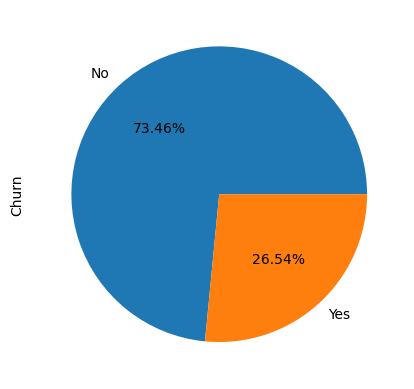

In [21]:
df.Churn.value_counts().plot(kind='pie',autopct=lambda p: '{:.2f}%'.format(p))

In [22]:
df_y = df[df['Churn']=='Yes']
df_n = df[df['Churn']=='No']

In [23]:
df_y

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


Note：Imbalance data

### 3.2 Personal Information

In [24]:
churn_female = len(df_y[df_y['gender']=='Female'])
churn_male = len(df_y[df_y['gender']=='Male'])
churn_Senior = len(df_y[df_y['SeniorCitizen']==1])
churn_notSenior = len(df_y[df_y['SeniorCitizen']==0])
churn_Partner = len(df_y[df_y['Partner']=='Yes'])
churn_noPartner = len(df_y[df_y['Partner']=='No'])
churn_Depen = len(df_y[df_y['Dependents']=='Yes'])
churn_noDepen = len(df_y[df_y['Dependents']=='No'])
churn = [churn_female,churn_male,0,churn_Senior,churn_notSenior,0,
         churn_Partner,churn_noPartner,0,churn_Depen,churn_noDepen]
churn

[939, 930, 0, 476, 1393, 0, 669, 1200, 0, 326, 1543]

In [25]:
noChurn_female = len(df_n[df_n['gender']=='Female'])
noChurn_male = len(df_n[df_n['gender']=='Male'])
noChurn_Senior = len(df_n[df_n['SeniorCitizen']==1])
noChurn_notSenior = len(df_n[df_n['SeniorCitizen']==0])
noChurn_Partner = len(df_n[df_n['Partner']=='Yes'])
noChurn_noPartner = len(df_n[df_n['Partner']=='No'])
noChurn_Depen = len(df_n[df_n['Dependents']=='Yes'])
noChurn_noDepen = len(df_n[df_n['Dependents']=='No'])
noChurn = [noChurn_female,noChurn_male,0,noChurn_Senior,noChurn_notSenior,0,
         noChurn_Partner,noChurn_noPartner,0,noChurn_Depen,noChurn_noDepen]
noChurn

[2549, 2625, 0, 666, 4508, 0, 2733, 2441, 0, 1784, 3390]

In [26]:
X = ['Female','Male',' ','Senior','NotSenior','  ','Partner','NoPartner','   ','Dependent','NoDependent']

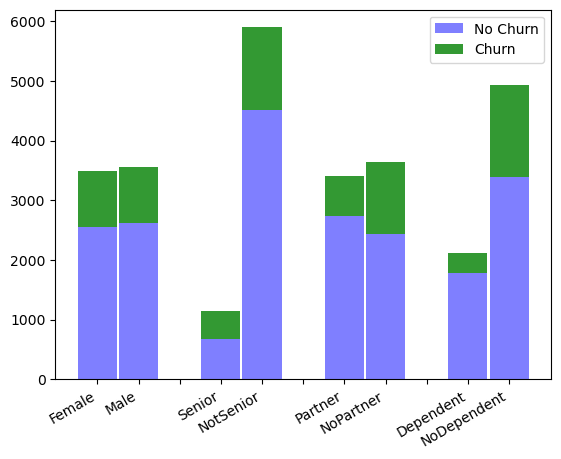

In [27]:
plt.bar(X,noChurn,color = 'blue',width=0.95, alpha = 0.5)
plt.bar(X,churn,color = 'green', bottom = noChurn,width=0.95,alpha = 0.8)
plt.xticks(rotation = 30, ha='right')
plt.legend(['No Churn','Churn'])
plt.rcParams['figure.figsize'] = (9,6.5)
# plt.savefig('person_info.png')

In [28]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


note：
1. Female (50%) vs Male (50%). The churning rate for both are almost equal (27% vs 26%).There is no significant affect of gender on churn rate.

2. non senior (84%) vs senior (16%); senior people is more likely to churn (42%), higher than non senior people(24%).

3. with partner (48%) vs without partner (52%); customer without partner is more likely to churn (33%), higher than customer with partner (22%)

4. dependents (30%) vs without dependents (30%); customer without dependents is more likely to churn (31%),than with dependent (15%)

5. will do correlation after one-hot-coding


### 3.3 Features of Enrolled Services

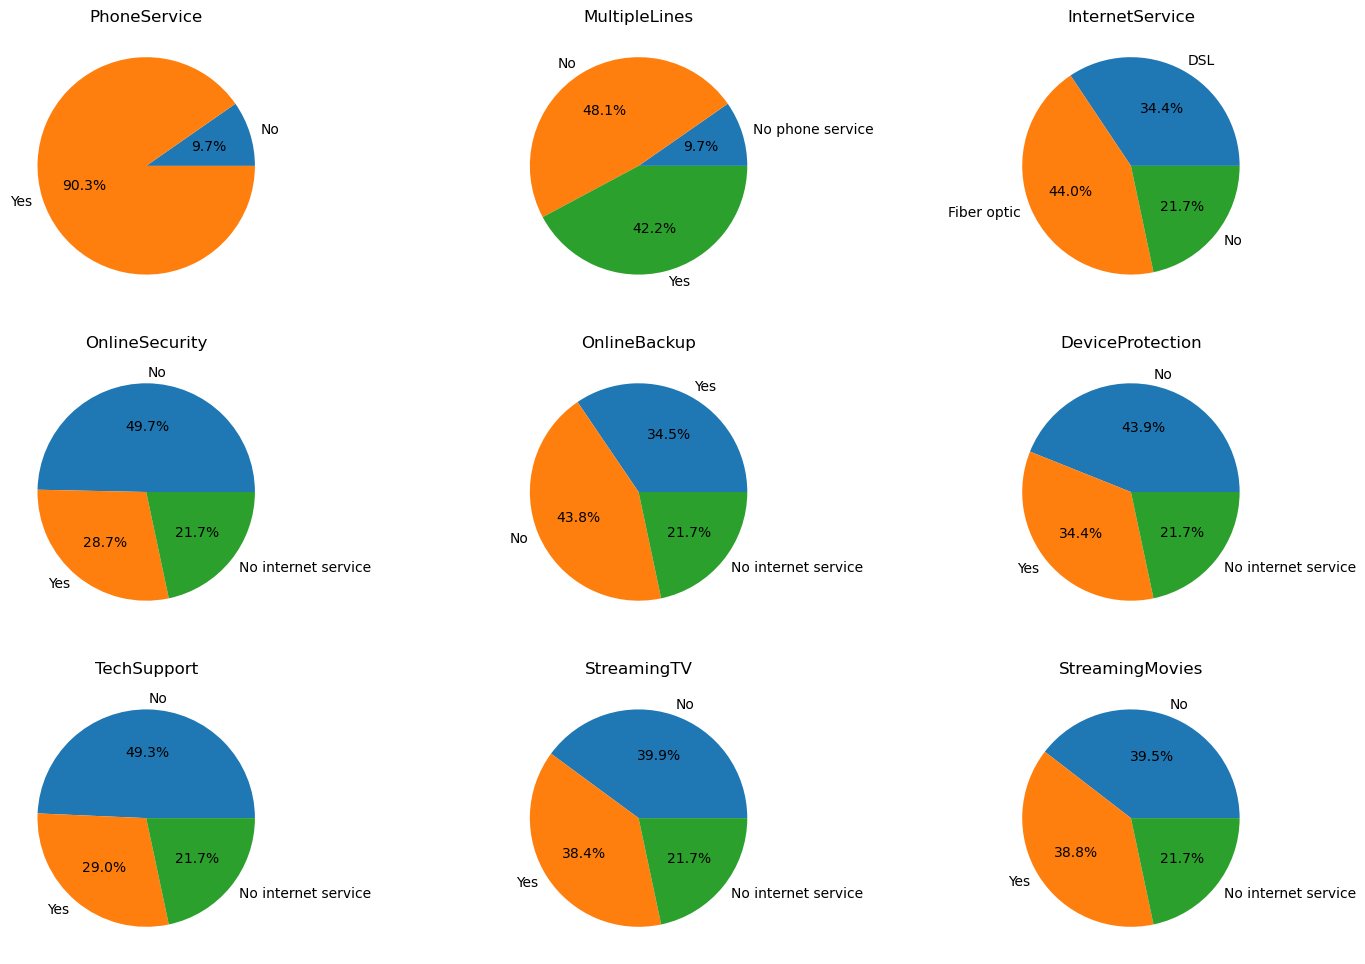

In [29]:
services = ['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

fig=plt.figure(figsize=(18,12))

for i in range(0,9):
    plt.subplot(3, 3, i+1)
    count=df[services[i]].value_counts(sort=False)
    label=df[services[i]].unique()
    total=len(df.index)
    def pct(x):
        return '{:.1f}%'.format(x)
        #return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

    plt.pie(count,labels=label,autopct=pct)
    plt.title(services[i])

In [30]:
Services=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
d_list=[]
for i in range(len(Services)):
        d=df[Services[i]].value_counts().to_frame()
        d_list.append(d)
df_Services=pd.concat(d_list, axis=1)
        


In [31]:
df_Services

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,3498,3088,3095,3473,2810,2785
Yes,2019,2429,2422,2044,2707,2732
No internet service,1526,1526,1526,1526,1526,1526


In [32]:

churn_phoneservice_y = len(df_y[df_y['PhoneService']=='Yes'])
churn_phoneservice_n = len(df_y[df_y['PhoneService']=='No'])
churn_multiplelines_y = len(df_y[df_y['MultipleLines']=='Yes'])
churn_multiplelines_n = len(df_y[df_y['MultipleLines']=='No'])
churn_multiplelines_ns = len(df_y[df_y['MultipleLines']=='No phone service'])

churn = [churn_phoneservice_y,churn_phoneservice_n,0,churn_multiplelines_y,churn_multiplelines_n,churn_multiplelines_ns]
churn

[1699, 170, 0, 850, 849, 170]

In [33]:
nochurn_phoneservice_y = len(df_n[df_n['PhoneService']=='Yes'])
nochurn_phoneservice_n = len(df_n[df_n['PhoneService']=='No'])
nochurn_multiplelines_y = len(df_n[df_n['MultipleLines']=='Yes'])
nochurn_multiplelines_n = len(df_n[df_n['MultipleLines']=='No'])
nochurn_multiplelines_ns = len(df_n[df_n['MultipleLines']=='No phone service'])

nochurn = [nochurn_phoneservice_y,nochurn_phoneservice_n,0,nochurn_multiplelines_y,nochurn_multiplelines_n,nochurn_multiplelines_ns]
nochurn

[4662, 512, 0, 2121, 2541, 512]

In [34]:
X = ['PhoneService','NoPhoneService',' ','MultipleLines','NoMultipleLines','No phone service']

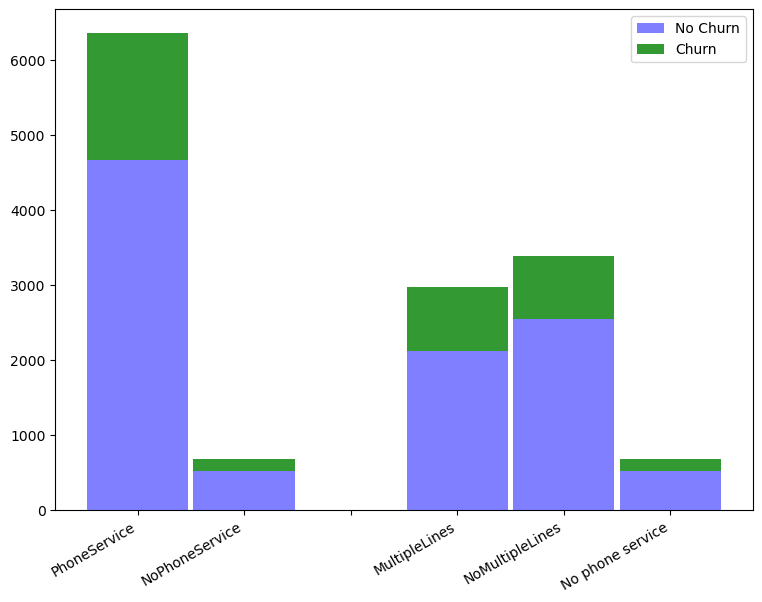

In [35]:
plt.bar(X,nochurn,color = 'blue',width=0.95, alpha = 0.5)
plt.bar(X,churn,color = 'green', bottom = nochurn,width=0.95,alpha = 0.8)
plt.xticks(rotation = 30, ha='right')
plt.legend(['No Churn','Churn'])
plt.rcParams['figure.figsize'] = (9,6.5)
# plt.savefig('person_info.png')

Note:
1. with phoneservice (90%) vs without phoneservice (10%); churning rate similar (27% vs 25%)
2. Multiline(25%)/No Multiline(29%), TV(34%)/No TV(30%), Moive(34%)/No Movie(30%), the churning rate are similar.
3. Customer signed Fiber, No OnlineSecurity, No OnlineBackup, No DeviceProtectio, No TechSupport, Month-to-Month plan is more likely to churn. (39%~43%) No internet service customer churning rate is low (<10%)
4. For the different tec services, No internet serice rate are the same, the customer numbers are also the same, we believe they are the same even they are in the different columns, we may consider to leave one column and delete the rest of them after one-hot-coding.

### 3.4 Features of Contract Information

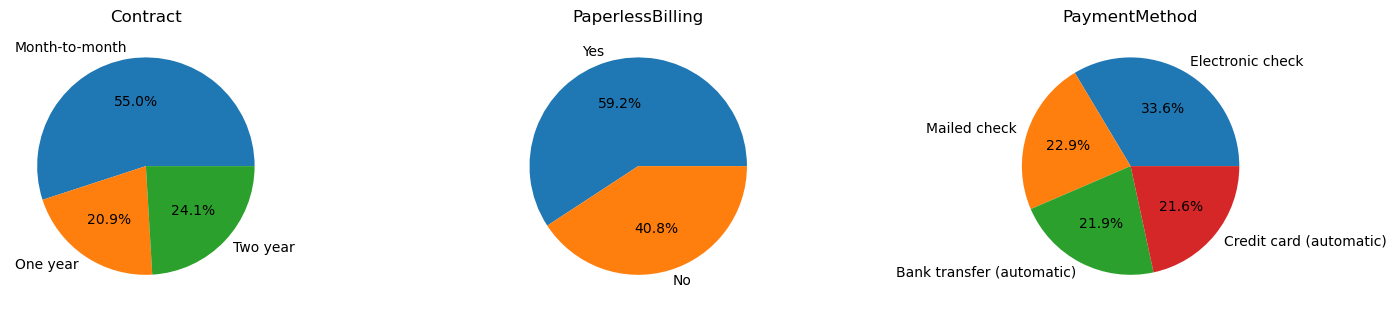

In [36]:
Contract = ['Contract', 'PaperlessBilling', 'PaymentMethod']

fig=plt.figure(figsize=(18,12))

for i in range(0,3):
    plt.subplot(3, 3, i+1)
    count=df[Contract[i]].value_counts(sort=False)
    label=df[Contract[i]].unique()
    total=len(df.index)
    def pct(x):
        return '{:.1f}%'.format(x)
        #return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

    plt.pie(count,labels=label,autopct=pct)
    plt.title(Contract[i])

In [37]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [38]:
Churn_m = len(df_y[df_y['Contract']=='Month-to-month'])
Churn_1y = len(df_y[df_y['Contract']=='One year'])
Churn_2y = len(df_y[df_y['Contract']=='Two year'])
Churn_paperless = len(df_y[df_y['PaperlessBilling']=='Yes'])
Churn_not_paperless = len(df_y[df_y['PaperlessBilling']=='No'])
Churn_mail = len(df_y[df_y['PaymentMethod']=='Mailed check'])
Churn_electric_check = len(df_y[df_y['PaymentMethod']=='Electronic check'])
Churn_bank_transfer = len(df_y[df_y['PaymentMethod']=='Bank transfer (automatic)'])
Churn_credit_card = len(df_y[df_y['PaymentMethod']=='Credit card (automatic)'])


churn = [Churn_m,Churn_1y,Churn_2y,0,Churn_paperless,Churn_not_paperless,0,Churn_mail,Churn_electric_check,Churn_bank_transfer,Churn_credit_card]

noChurn_m = len(df_n[df_n['Contract']=='Month-to-month'])
noChurn_1y = len(df_n[df_n['Contract']=='One year'])
noChurn_2y = len(df_n[df_n['Contract']=='Two year'])
noChurn_paperless = len(df_n[df_n['PaperlessBilling']=='Yes'])
noChurn_not_paperless = len(df_n[df_n['PaperlessBilling']=='No'])
noChurn_mail = len(df_n[df_n['PaymentMethod']=='Mailed check'])
noChurn_electric_check = len(df_n[df_n['PaymentMethod']=='Electronic check'])
noChurn_bank_transfer = len(df_n[df_n['PaymentMethod']=='Bank transfer (automatic)'])
noChurn_credit_card = len(df_n[df_n['PaymentMethod']=='Credit card (automatic)'])

noChurn = [noChurn_m,noChurn_1y,noChurn_2y,0,noChurn_paperless,noChurn_not_paperless,0,noChurn_mail,noChurn_electric_check,noChurn_bank_transfer,noChurn_credit_card]

In [39]:
churn

[1655, 166, 48, 0, 1400, 469, 0, 308, 1071, 258, 232]

In [40]:
noChurn

[2220, 1307, 1647, 0, 2771, 2403, 0, 1304, 1294, 1286, 1290]

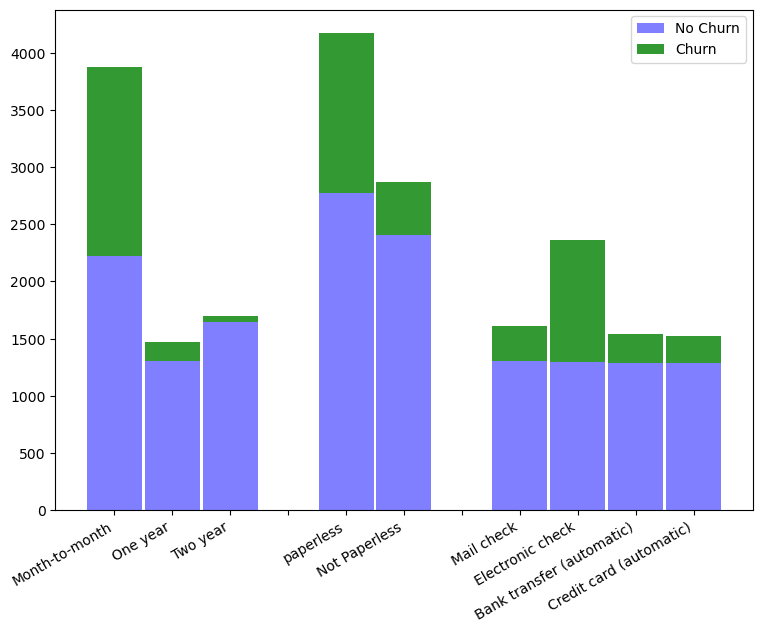

In [41]:
X = ['Month-to-month', 'One year','Two year',' ','paperless','Not Paperless','  ','Mail check','Electronic check','Bank transfer (automatic)','Credit card (automatic)']

plt.bar(X,noChurn,color = 'blue',width=0.95, alpha = 0.5)
plt.bar(X,churn,color = 'green', bottom = noChurn,width=0.95,alpha = 0.8)
plt.xticks(rotation = 30, ha='right')
plt.legend(['No Churn','Churn'])
plt.rcParams['figure.figsize'] = (9,6.5)
# plt.savefig('person_info.png')

Note:
1. Paperless (60%) vs paper (40%), customer singed for paperless is more likely to churn (34%) vs (16%).
2. Customer use electronic check has a higher churing rate. (45%)
3. Customers with One Year and Two Year contract tend to Churn a lot lesser than month to month contract
4. Month-to-Month plan is more likely to churn.

### 3.4 Numerical Features


### -tenure

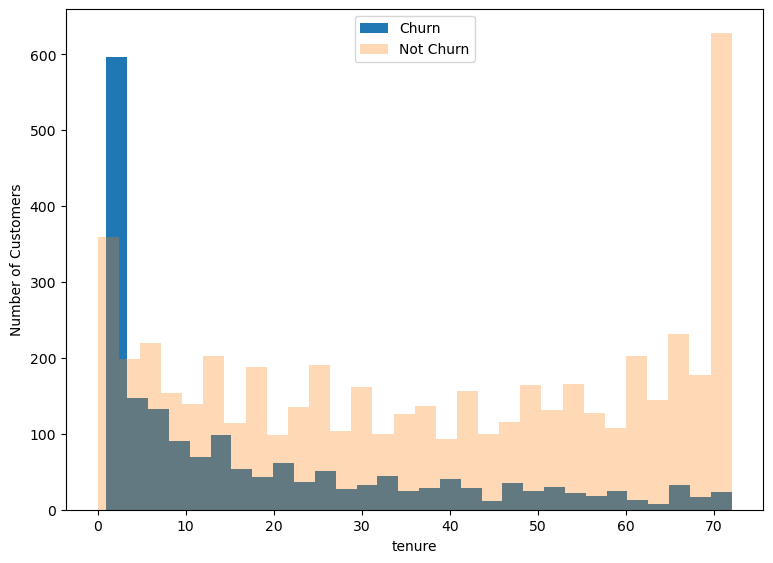

In [42]:
df[df['Churn']=='Yes'].tenure.plot(kind='hist', bins=30)
df[df['Churn']=='No'].tenure.plot(kind='hist', bins=30, alpha = 0.3)

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.legend(['Churn','Not Churn'])

# plt.savefig('tenure.png')

In [43]:
import seaborn as sns

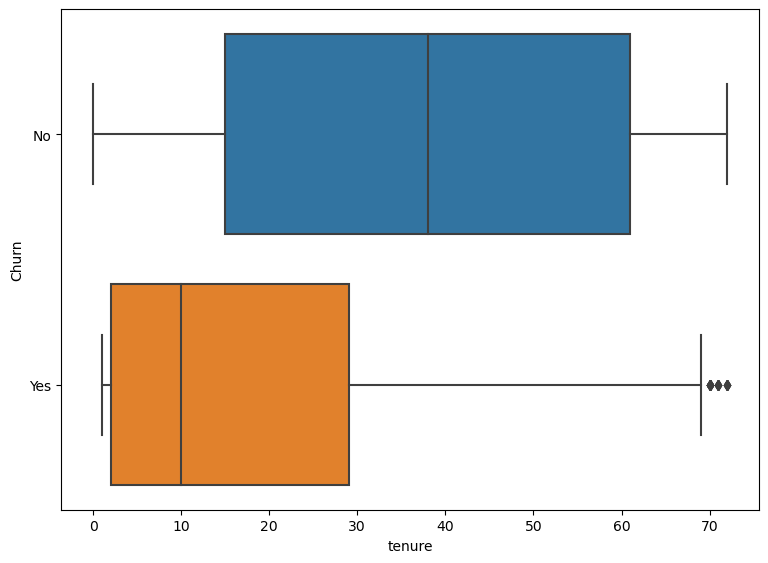

In [44]:
sns.boxplot(x='tenure',y='Churn',data=df)
plt.show()

Note: Customer with more tenure tends to churn less

### -Monthly Charges 

Plotting the side by side histogram for Customer Leaving and not leaving w.r.t their Monthly Charges

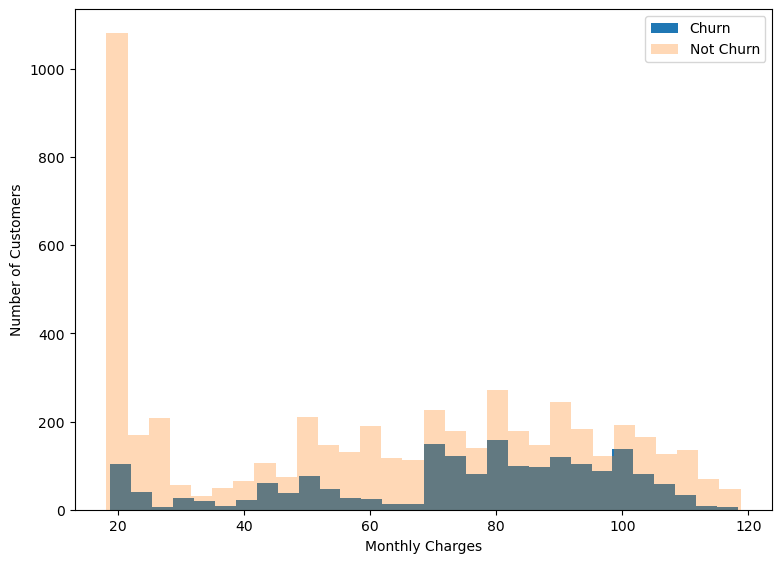

In [45]:
df[df['Churn']=='Yes'].MonthlyCharges.plot(kind='hist', bins=30)
df[df['Churn']=='No'].MonthlyCharges.plot(kind='hist', bins=30, alpha = 0.3)

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.legend(['Churn','Not Churn'])
# plt.savefig('MonthlyCharge.png')

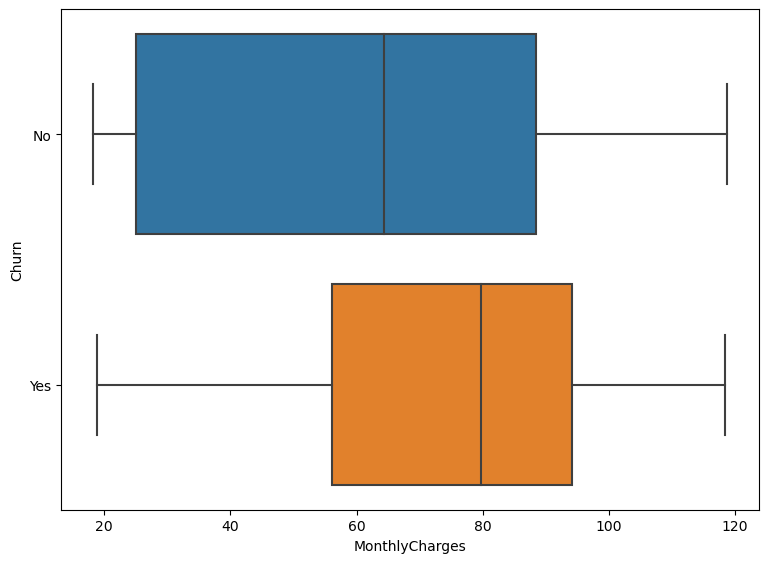

In [46]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = df)
plt.show()


Note:Customer with more monthly charges tends to churn more

### -TotalCharges

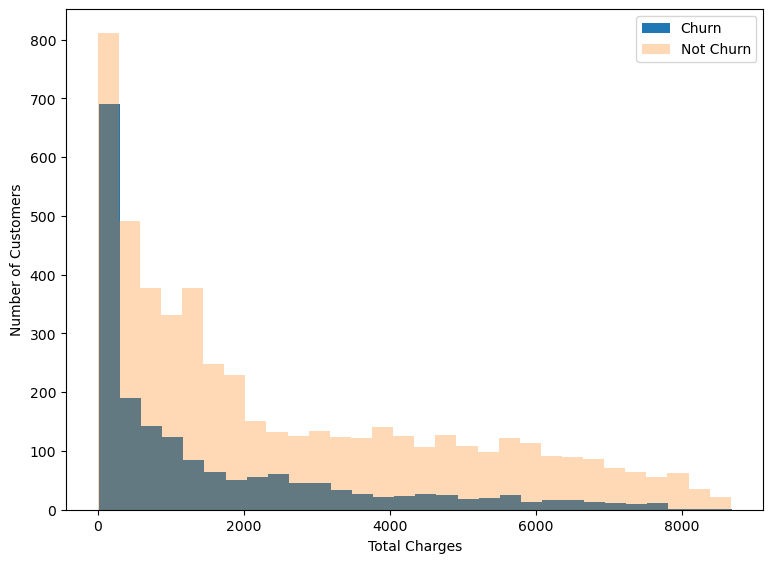

In [47]:
df[df['Churn']=='Yes'].TotalCharges.plot(kind='hist', bins=30)
df[df['Churn']=='No'].TotalCharges.plot(kind='hist', bins=30, alpha = 0.3)

plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.legend(['Churn','Not Churn'])
# plt.savefig('TotalCharge.png')

Note:Customers with more total charges tend less churn.


### -Data Relationship

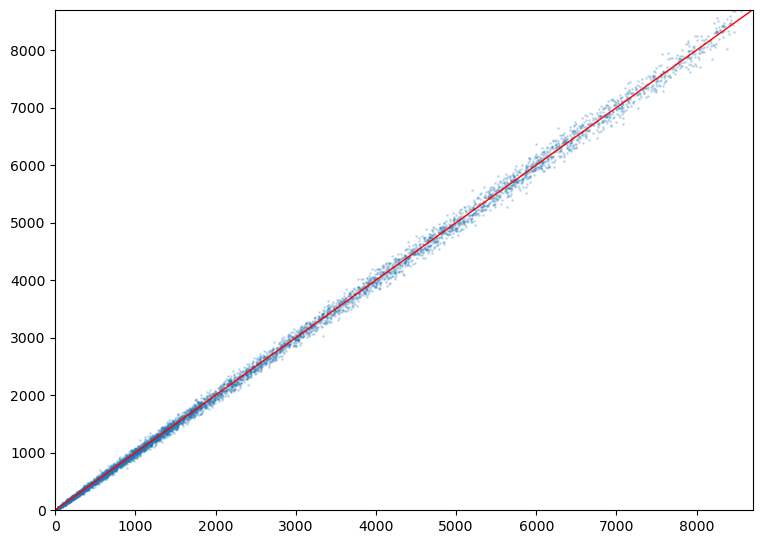

In [48]:
plt.scatter(df['tenure']*df['MonthlyCharges'],df['TotalCharges'],marker='o',s=1,alpha=0.2)
plt.xlim(0,8700)
plt.ylim(0,8700)
plt.plot([0,8700], [0,8700],color='r',linewidth=1)

Note: TotalCharges roughly equal tenure times MonthlyCharges

## 4. Feature Engineering

Creating function to look at the unique values of each column.

### 4.1 Convert catigorical data to numerical data

In [49]:
#This function will search and print for all the unique in each column.
def print_unique_col_values(dataframe):
    for column in dataframe:
        if dataframe[column].dtypes=='object':
            print(f'{column}:{dataframe[column].unique()}')

In [50]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']



Converting Yes to 1 and No to 0

In [51]:
yes_no_columns=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [52]:
for col in df:
    print(f'{col}:{df[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.

Also converting genders: Male to 0 and Female to 1.

In [53]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [54]:
df.gender.unique()

array([1, 0], dtype=int64)

### One Hot Encoding for Categorical Columns

In [55]:
df1=pd.get_dummies(data=df,columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'], dtype='objec

In [56]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2959,0,0,1,1,27,1,0,100.75,2793.55,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0
5198,1,1,1,0,47,1,0,80.35,3825.85,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3361,1,1,0,0,64,1,0,74.65,4869.35,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0
3228,0,0,1,1,53,1,1,105.25,5576.30,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
1669,1,0,0,0,8,1,1,74.60,548.90,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0


In [57]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

In [58]:
df1.shape

(7043, 41)

drop redundant No internet service

In [59]:
drop_column=['MultipleLines_No phone service','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service']
df2=df1.drop(columns=drop_column)

In [60]:
df2.shape

(7043, 34)

drop "TotalCharges" 

In [61]:
df3 = df2.drop(columns = ['TotalCharges'])
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0


### 4.2 Create new features

Considering that more services enrolled may result less churns, we would like to create two features: 1. the total number of internet services; 2. whether phone service & internet service are both enrolled.

In [62]:
services = ['OnlineSecurity_Yes','OnlineBackup_Yes','TechSupport_Yes',
            'DeviceProtection_Yes','StreamingTV_Yes','StreamingMovies_Yes']

df3['Number_of_InternetServices'] = df3[services].sum(axis=1)
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Number_of_InternetServices
0,1,0,1,0,1,0,1,29.85,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1
1,0,0,0,0,34,1,0,56.95,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,2
2,0,0,0,0,2,1,1,53.85,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,2
3,0,0,0,0,45,0,0,42.30,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,3
4,1,0,0,0,2,1,1,70.70,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0


In [63]:
df3.Number_of_InternetServices.value_counts()

0    2219
3    1118
2    1033
1     966
4     852
5     571
6     284
Name: Number_of_InternetServices, dtype: int64

In [64]:
phone_internet = ['PhoneService','InternetService_DSL','InternetService_Fiber optic']

df3['Phone_Internet'] = df3[phone_internet].sum(axis=1)
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Number_of_InternetServices,Phone_Internet
0,1,0,1,0,1,0,1,29.85,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1
1,0,0,0,0,34,1,0,56.95,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,2,2
2,0,0,0,0,2,1,1,53.85,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,2,2
3,0,0,0,0,45,0,0,42.30,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,3,1
4,1,0,0,0,2,1,1,70.70,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,2


In [65]:
df3.Phone_Internet.value_counts()

2    4835
1    2208
Name: Phone_Internet, dtype: int64

In [66]:
df3['Phone_Internet'] = df3['Phone_Internet'].map(lambda x: 1 if x ==2 else 0)
df3.Phone_Internet.value_counts()

1    4835
0    2208
Name: Phone_Internet, dtype: int64

In [67]:
df3.to_csv('After_Feature_Engineering.csv')

In [84]:
df3.shape

(7043, 35)

### There are 35 features in total that are taken as orinigal features into the initial model selection

Scaling the columns:**Tenure, Monthly Charges and Total Charges** columns in the range 0 to 1

In [69]:
cols_to_scale = ['tenure','MonthlyCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df3[cols_to_scale]=scaler.fit_transform(df3[cols_to_scale])

In [70]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Number_of_InternetServices,Phone_Internet
0,1,0,1,0,0.013889,0,1,0.115423,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0.472222,1,0,0.385075,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,2,1
2,0,0,0,0,0.027778,1,1,0.354229,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,2,1
3,0,0,0,0,0.625000,0,0,0.239303,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,3,0
4,1,0,0,0,0.027778,1,1,0.521891,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1


In [71]:
personal_corr=df2[['gender','SeniorCitizen','Partner','Dependents','Churn']].corr(method='pearson')

In [72]:
personal_corr

,gender,SeniorCitizen,Partner,Dependents,Churn
gender,1.000000,0.001874,0.001808,-0.010517,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,-0.164221
Churn,0.008612,0.150889,-0.150448,-0.164221,1.000000


<AxesSubplot:>

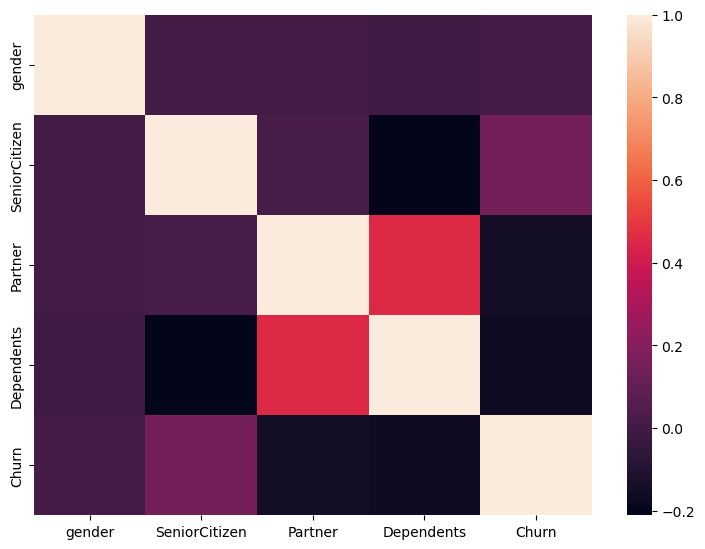

In [73]:
import seaborn as sns
sns.heatmap(personal_corr)

gender has low correlation with Churn

In [74]:
account_corr=df3[['tenure','MonthlyCharges', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn']].corr(method='pearson')

In [75]:
account_corr

,tenure,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
tenure,1.000000,0.247900,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852,-0.352229
MonthlyCharges,0.247900,1.000000,0.060165,0.004904,-0.074681,0.042812,0.030550,0.271625,-0.377437,0.193356
Contract_Month-to-month,-0.645561,0.060165,1.000000,-0.568744,-0.622633,-0.179707,-0.204145,0.331661,0.004138,0.405103
Contract_One year,0.202570,0.004904,-0.568744,1.000000,-0.289510,0.057451,0.067589,-0.109130,-0.000116,-0.177820
Contract_Two year,0.558533,-0.074681,-0.622633,-0.289510,1.000000,0.154471,0.173265,-0.282138,-0.004705,-0.302253
PaymentMethod_Bank transfer (automatic),0.243510,0.042812,-0.179707,0.057451,0.154471,1.000000,-0.278215,-0.376762,-0.288685,-0.117937
PaymentMethod_Credit card (automatic),0.233006,0.030550,-0.204145,0.067589,0.173265,-0.278215,1.000000,-0.373322,-0.286049,-0.134302
PaymentMethod_Electronic check,-0.208363,0.271625,0.331661,-0.109130,-0.282138,-0.376762,-0.373322,1.000000,-0.387372,0.301919
PaymentMethod_Mailed check,-0.233852,-0.377437,0.004138,-0.000116,-0.004705,-0.288685,-0.286049,-0.387372,1.000000,-0.091683
Churn,-0.352229,0.193356,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683,1.000000


<AxesSubplot:>

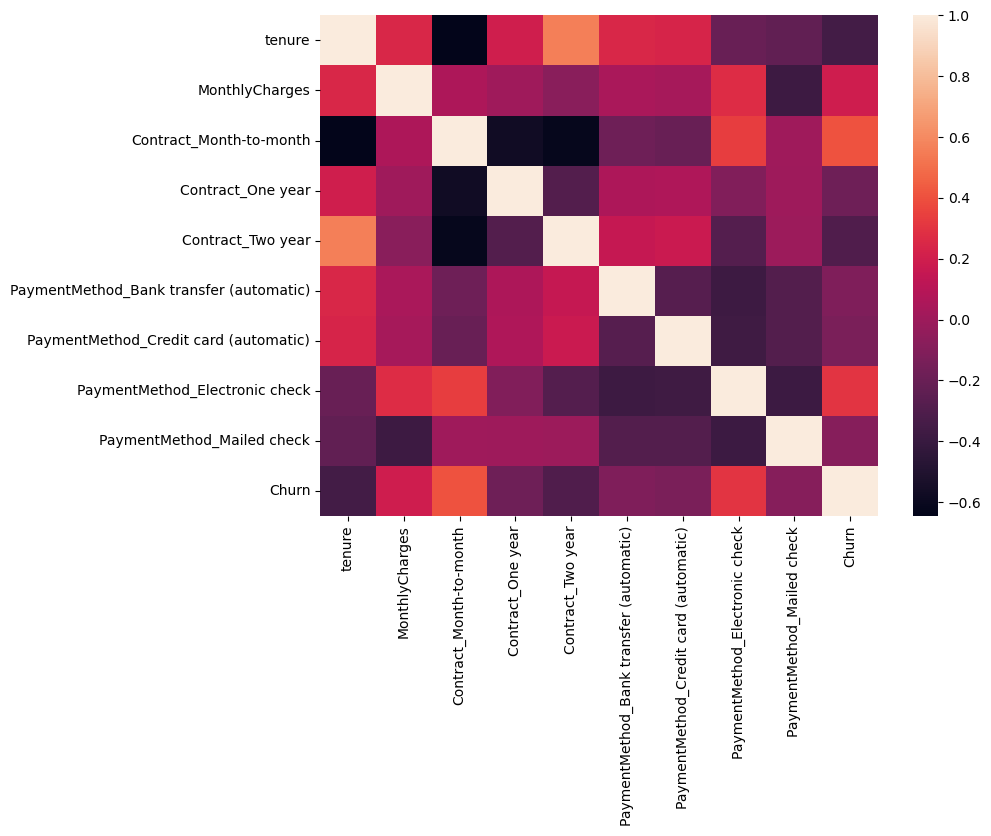

In [76]:
sns.heatmap(account_corr)

In [77]:
numerical_corr=df2[['tenure','MonthlyCharges','TotalCharges', 'Churn']].corr(method='pearson')

In [78]:
numerical_corr

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.826178,-0.352229
MonthlyCharges,0.247900,1.000000,0.651174,0.193356
TotalCharges,0.826178,0.651174,1.000000,-0.198324
Churn,-0.352229,0.193356,-0.198324,1.000000


<AxesSubplot:>

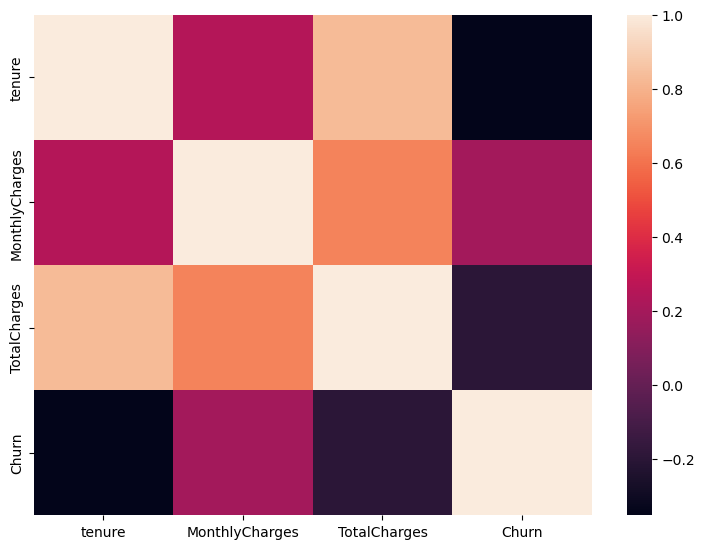

In [79]:
sns.heatmap(numerical_corr)

#### Do we need to use PCA?

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA()
df3_pca = pca.fit_transform(df3)
df3_pca

array([[-1.25412791e+00, -7.48864107e-01,  9.75662418e-01, ...,
         1.17974533e-17,  8.32658466e-16,  9.54232017e-15],
       [-2.10822170e-01,  2.44045911e-01,  1.55819013e+00, ...,
        -5.04823499e-15, -2.93347442e-15,  5.38708313e-15],
       [-3.57896147e-01, -5.80244994e-01,  1.55297519e+00, ...,
         1.26147237e-15,  4.26720126e-15,  1.20118443e-15],
       ...,
       [-1.27673237e+00, -4.84333524e-01,  1.35933325e+00, ...,
        -8.83431181e-17,  1.72779014e-16,  1.46025695e-16],
       [-2.13409537e+00, -1.67240933e+00, -2.22537737e-01, ...,
         1.94409541e-16,  7.02248705e-17, -2.74819869e-17],
       [ 3.27142818e+00,  5.98167302e-01, -1.59401435e-01, ...,
        -2.23454491e-16,  3.66094780e-17,  2.21112883e-16]])

<BarContainer object of 35 artists>

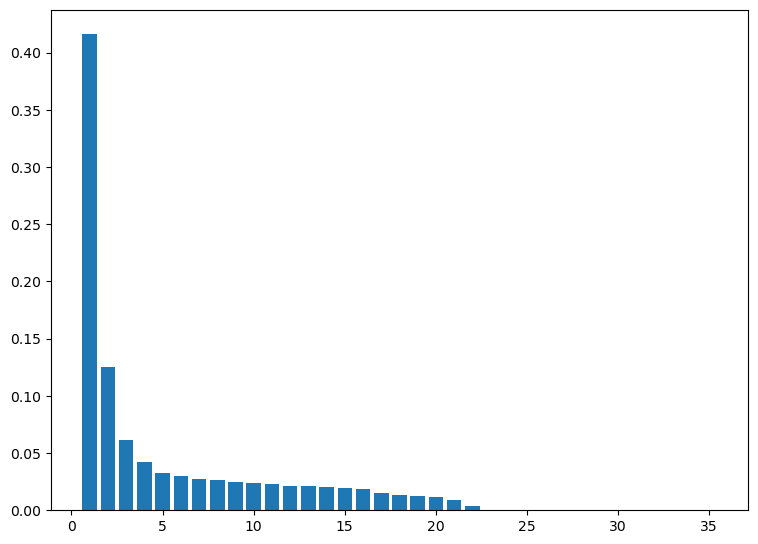

In [82]:
import matplotlib.pylab as plt
%matplotlib inline

x = [i for i in range(1, pca.n_components_ + 1)]
y = pca.explained_variance_ratio_
plt.bar(x, y)

<BarContainer object of 35 artists>

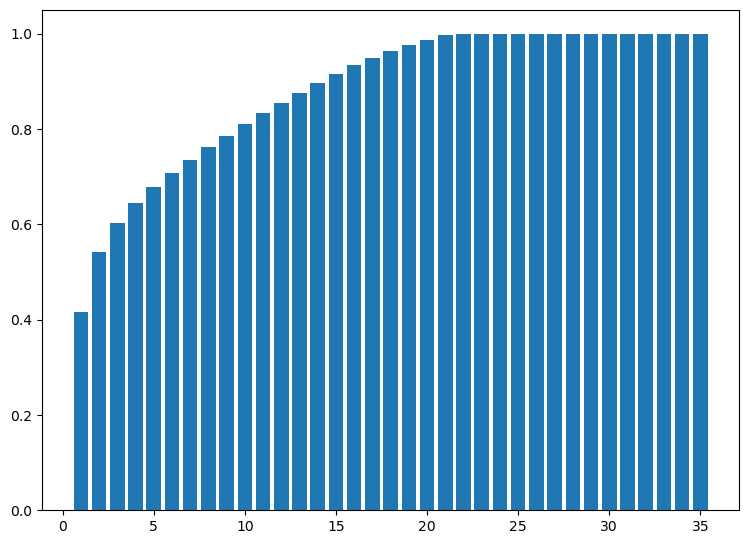

In [83]:
variance = pca.explained_variance_ratio_
num = [i+1 for i in range(len(variance))]
y = [sum(variance[:i+1]) for i in range(len(variance))]
plt.bar(num, y)

## 5. Model Building, Evaluating, Comparison and Tuning

### 5.1 Splitting the Dataset to Test and Train Dataset

In [85]:
X=df3.drop('Churn',axis='columns')
#X=X.drop('gender',axis='columns')
y=df3['Churn']

In [86]:
sum(y)/len(y)

0.2653698707936959

In [87]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [88]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Number_of_InternetServices,Phone_Internet
0,1,0,1,0,0.013889,0,1,0.115423,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0.472222,1,0,0.385075,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,2,1
2,0,0,0,0,0.027778,1,1,0.354229,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,2,1
3,0,0,0,0,0.625000,0,0,0.239303,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,3,0
4,1,0,0,0,0.027778,1,1,0.521891,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,0.662189,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,5,1
7039,1,0,1,1,1.000000,1,1,0.845274,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,4,1
7040,1,0,1,1,0.152778,0,1,0.112935,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0
7041,0,1,1,0,0.055556,1,1,0.558706,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1


In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

In [90]:
sum(y_train)/len(y_train)

0.2653532126375577

In [91]:
sum(y_test)/len(y_test)

0.2654364797728886

In [92]:
X_train.shape

(5634, 34)

In [93]:
X_test.shape

(1409, 34)

In [94]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Number_of_InternetServices,Phone_Internet
3031,1,1,1,0,0.694444,1,1,0.525373,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1
4569,1,0,0,0,0.305556,1,1,0.303980,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1
6636,1,0,1,1,0.138889,1,0,0.517910,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,3,1
3067,0,0,0,0,0.083333,1,1,0.658209,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,2,1
5769,1,0,1,1,0.986111,1,1,0.902985,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,5,1
3623,0,1,1,0,0.513889,1,1,0.537313,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
795,0,0,1,0,0.027778,1,1,0.457214,1,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,3,1
2631,0,1,1,0,0.097222,1,1,0.805970,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,3,1
1782,1,1,0,0,0.361111,1,1,0.475622,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,2,1
507,0,0,1,0,0.027778,1,1,0.755721,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,3,1


In [95]:
len(X_train.columns)

34

In [96]:
y_train

3031    1
4569    1
6636    0
3067    1
5769    0
       ..
2792    0
6881    0
2906    0
2823    0
6643    0
Name: Churn, Length: 5634, dtype: int64

### 5.2 Use default ML model (Logistic Regression Model, Decision Tree Model, RandomForest Model, GradientBoosting Model, XGBoost Model and Support Vector Machines) to predict¶

In [97]:
pip install xgboost

Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/
Note: you may need to restart the kernel to use updated packages.


In [98]:
!conda install -c conda-forge xgboost -y

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [112]:
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [151]:
models_default = {
    
    'LogisticRegression': LogisticRegression(random_state=42), 
    
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    
    'RandomForest':RandomForestClassifier(random_state=42),

    'GradientBoosting': GradientBoostingClassifier(random_state=42),
        
    'XGBoost': XGBClassifier(random_state=42),
    
    'SVC': SVC(random_state=42),
        
}

results_default = []


for model_name, model in models_default.items():

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_acc = round(accuracy_score(y_train, y_train_pred),3)
    train_pre = round(precision_score(y_train, y_train_pred),3)
    train_recall = round(recall_score(y_train, y_train_pred),3)
    train_f1 = round(f1_score(y_train, y_train_pred),3)
    train_roc_auc = round(roc_auc_score(y_train, y_train_pred),3)

    y_test_pred = model.predict(X_test)
    test_acc = round(accuracy_score(y_test, y_test_pred),3)
    test_pre = round(precision_score(y_test, y_test_pred),3)
    test_recall = round(recall_score(y_test, y_test_pred),3)
    test_f1 = round(f1_score(y_test, y_test_pred),3)
    test_roc_auc = round(roc_auc_score(y_test, y_test_pred),3)
    
    results_default.append({
        'Model': model_name,
        'Train_accuracy': train_acc,
        'Test_accuracy': test_acc,
        'Train_precision': train_pre,
        'Test_precision': test_pre,
        'Train_recall': train_recall,
        'Test_recall': test_recall,
        'Train_f1': train_f1,
        'Test_f1': test_f1,
        'Train_roc_auc': train_roc_auc,
        'Test_roc_auc': test_roc_auc,
    })

In [152]:
models_default_compare = pd.DataFrame(results_default).set_index('Model')
models_default_compare.index.names = [None]
models_default_compare

,Train_accuracy,Test_accuracy,Train_precision,Test_precision,Train_recall,Test_recall,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc
LogisticRegression,0.810,0.789,0.671,0.631,0.554,0.489,0.607,0.551,0.728,0.693
DecisionTree,0.997,0.728,0.999,0.488,0.990,0.505,0.995,0.497,0.995,0.657
RandomForest,0.997,0.791,0.996,0.647,0.993,0.465,0.995,0.541,0.996,0.687
GradientBoosting,0.829,0.796,0.723,0.654,0.574,0.495,0.640,0.563,0.747,0.700
XGBoost,0.940,0.777,0.905,0.599,0.864,0.484,0.884,0.536,0.916,0.684
SVC,0.813,0.787,0.699,0.641,0.516,0.449,0.594,0.528,0.718,0.679


overfitting, need to tune hyperparameters

### 5.2 Tune Hyperparameters

In [164]:
model_params = {
    
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {}  
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 4, 8],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },

    'XGBoost': {
        'model': XGBClassifier(objective='binary:logistic',random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1,0.2]
        }
    },
    
    'SVC': {
        'model': SVC(random_state=42),
        'params':{
            'C':[0.5,1,100],
            'gamma':['scale',1,0.1,0.01,0.001]   
        }
    }
}

results_tunePara = []

# Loop through the models and perform grid search


for model_name, mp in model_params.items():

    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='recall')
    # recall as the score metrics to choose best parameters
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_train_pred = best_model.predict(X_train)
    train_acc = round(accuracy_score(y_train, y_train_pred),3)
    train_pre = round(precision_score(y_train, y_train_pred),3)
    train_recall = round(recall_score(y_train, y_train_pred),3)
    train_f1 = round(f1_score(y_train, y_train_pred),3)
    train_roc_auc = round(roc_auc_score(y_train, y_train_pred),3)

    y_test_pred = best_model.predict(X_test)
    test_acc = round(accuracy_score(y_test, y_test_pred),3)
    test_pre = round(precision_score(y_test, y_test_pred),3)
    test_recall = round(recall_score(y_test, y_test_pred),3)
    test_f1 = round(f1_score(y_test, y_test_pred),3)
    test_roc_auc = round(roc_auc_score(y_test, y_test_pred),3)
    
    results_tunePara.append({
        'Model': model_name,
        'Train_accuracy': train_acc,
        'Test_accuracy': test_acc,
        'Train_precision': train_pre,
        'Test_precision': test_pre,
        'Train_recall': train_recall,
        'Test_recall': test_recall,
        'Train_f1': train_f1,
        'Test_f1': test_f1,
        'Train_roc_auc': train_roc_auc,
        'Test_roc_auc': test_roc_auc,
        'Best_Parameters': grid_search.best_params_,        
    })


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:
models_tunePara_compare = pd.DataFrame(results_tunePara).set_index('Model')
models_tunePara_compare.index.names = [None]
models_tunePara_compare



,Train_accuracy,Test_accuracy,Train_precision,Test_precision,Train_recall,Test_recall,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.810,0.789,0.671,0.631,0.554,0.489,0.607,0.551,0.728,0.693,{}
DecisionTree,0.881,0.747,0.785,0.525,0.758,0.508,0.771,0.516,0.841,0.671,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
RandomForest,0.867,0.787,0.786,0.630,0.684,0.479,0.732,0.544,0.809,0.689,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
GradientBoosting,0.829,0.796,0.723,0.654,0.574,0.495,0.640,0.563,0.747,0.700,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
XGBoost,0.846,0.789,0.762,0.638,0.613,0.471,0.680,0.542,0.772,0.687,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
SVC,0.902,0.754,0.824,0.536,0.800,0.532,0.812,0.534,0.869,0.683,"{'C': 100, 'gamma': 'scale'}"


In [166]:
models_tunePara_compare.Best_Parameters.values

array([{},
       {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2},
       {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10},
       {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100},
       {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50},
       {'C': 100, 'gamma': 'scale'}], dtype=object)

### 5.3 Imbalance Problem Handling

### 5.3.1 Method 1 - Use weight balance parameter

In [170]:
pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1]
# Set the weights of the class 0 and class 1, this value is used for GradientBoosting and XGB

model_params = {
    
    'LogisticRegression': {
        'model': LogisticRegression(class_weight='balanced',random_state=42),
        'params': {}  
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier(class_weight='balanced',random_state=42),
        'params': {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced',random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 4, 8],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },


    'XGBoost': {
        'model': XGBClassifier(objective='binary:logistic',scale_pos_weight=pos_weight,random_state=42),
        'params': {
            'n_estimators': [25, 50, 100, 200],
            'max_depth': [2, 3, 5, 7],
            'learning_rate': [0.01, 0.1,0.2]
        }
    },
    
    'SVC': {
        'model': SVC(class_weight='balanced',random_state=42),
        'params':{
            'C':[0.5,1,100],
            'gamma':['scale',1,0.1,0.01,0.001]   
        }
    }
}

results_weighted_1 = []

# Loop through the models and perform grid search


for model_name, mp in model_params.items():

    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='recall')
    
    if model_name == 'GradientBoosting':
        sample_weight = np.array([pos_weight if i == 1 else 1 for i in y_train])
        grid_search.fit(X_train, y_train, sample_weight=sample_weight)
#     Special case for model GradientBoosting, it requires setting sampele_weight in fitting

    else:
        grid_search.fit(X_train, y_train)

        
    best_model = grid_search.best_estimator_
#     The best model is the model with the best parameters setting

    y_train_pred = best_model.predict(X_train)
    train_acc = round(accuracy_score(y_train, y_train_pred),3)
    train_pre = round(precision_score(y_train, y_train_pred),3)
    train_recall = round(recall_score(y_train, y_train_pred),3)
    train_f1 = round(f1_score(y_train, y_train_pred),3)
    train_roc_auc = round(roc_auc_score(y_train, y_train_pred),3)

    y_test_pred = best_model.predict(X_test)
    test_acc = round(accuracy_score(y_test, y_test_pred),3)
    test_pre = round(precision_score(y_test, y_test_pred),3)
    test_recall = round(recall_score(y_test, y_test_pred),3)
    test_f1 = round(f1_score(y_test, y_test_pred),3)
    test_roc_auc = round(roc_auc_score(y_test, y_test_pred),3)
    
    results_weighted_1.append({
        'Model': model_name,
        'Train_accuracy': train_acc,
        'Test_accuracy': test_acc,
        'Train_precision': train_pre,
        'Test_precision': test_pre,
        'Train_recall': train_recall,
        'Test_recall': test_recall,
        'Train_f1': train_f1,
        'Test_f1': test_f1,
        'Train_roc_auc': train_roc_auc,
        'Test_roc_auc': test_roc_auc,
        'Best_Parameters': grid_search.best_params_,
        
    })

In [171]:
models_weighted_compare1 = pd.DataFrame(results_weighted_1).set_index('Model')
models_weighted_compare1.index.names = [None]

models_weighted_compare1

,Train_accuracy,Test_accuracy,Train_precision,Test_precision,Train_recall,Test_recall,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.750,0.757,0.519,0.527,0.795,0.802,0.628,0.636,0.764,0.771,{}
DecisionTree,0.750,0.742,0.518,0.509,0.823,0.794,0.636,0.620,0.773,0.758,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s..."
RandomForest,0.751,0.744,0.520,0.512,0.797,0.786,0.630,0.620,0.766,0.758,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s..."
GradientBoosting,0.739,0.745,0.505,0.513,0.816,0.821,0.624,0.631,0.764,0.769,"{'learning_rate': 0.01, 'n_estimators': 100}"
XGBoost,0.729,0.730,0.494,0.494,0.793,0.773,0.608,0.603,0.750,0.743,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est..."
SVC,0.700,0.704,0.464,0.468,0.833,0.832,0.596,0.599,0.742,0.745,"{'C': 1, 'gamma': 0.01}"


In [172]:
models_weighted_compare1.Best_Parameters.values

array([{},
       {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2},
       {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10},
       {'learning_rate': 0.01, 'n_estimators': 100},
       {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 25},
       {'C': 1, 'gamma': 0.01}], dtype=object)

### Plot ROC_AUC

In [117]:
from sklearn import metrics

In [118]:
# A function to store all the roc_auc data of models

def draw_roc_auc(model_name,model,X_test,y_test,roc_auc):
    y_test_proba = model.predict_proba(X_test)
    auc = round(roc_auc_score(y_test, y_test_proba[:, 1]),2)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_proba[:, 1]) 
        
    roc_auc.append({
        'Model': model_name,
        'fpr': fpr,
        'tpr': tpr, 
        'auc': auc
    })
    return roc_auc

In [119]:
# List all the best models for loop, SVC has no predicted probablity, so can not draw its ROC curve

best_models = {
    
    'LogisticRegression': LogisticRegression(random_state=42), 
    
    'DecisionTree': DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=2,random_state=42),
    
    'RandomForest':RandomForestClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=2,n_estimators=50,random_state=42),

    'GradientBoosting': GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=50,random_state=42),
        
    'XGBoost': XGBClassifier(objective='binary:logistic',scale_pos_weight=pos_weight, 
                             learning_rate=0.01, max_depth=3, n_estimators=50,random_state=42),
            
}

roc_auc = []
for model_name, model in best_models.items():

    model.fit(X_train, y_train)
    roc_auc=draw_roc_auc(model_name, model,X_test,y_test,roc_auc)

In [120]:
roc_df = pd.DataFrame(roc_auc)
roc_df

,Model,fpr,tpr,auc
0,LogisticRegression,"[0.0, 0.0, 0.0, 0.000966183574879227, 0.000966...","[0.0, 0.00267379679144385, 0.0374331550802139,...",0.85
1,DecisionTree,"[0.0, 0.005797101449275362, 0.0280193236714975...","[0.0, 0.10427807486631016, 0.22459893048128343...",0.84
2,RandomForest,"[0.0, 0.0, 0.000966183574879227, 0.00096618357...","[0.0, 0.00267379679144385, 0.00267379679144385...",0.85
3,GradientBoosting,"[0.0, 0.028019323671497585, 0.0289855072463768...","[0.0, 0.2192513368983957, 0.22994652406417113,...",0.84
4,XGBoost,"[0.0, 0.033816425120772944, 0.0357487922705314...","[0.0, 0.24866310160427807, 0.25133689839572193...",0.84


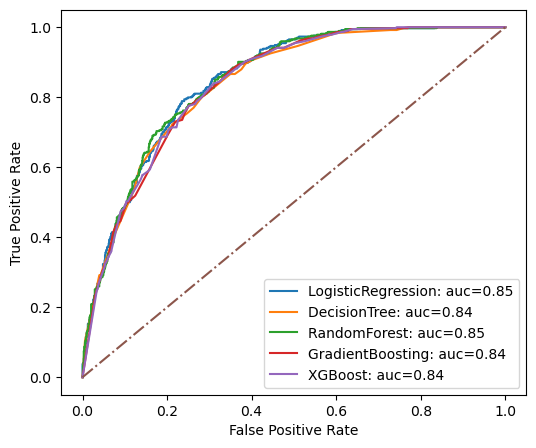

In [121]:
plt.figure(figsize=(6,5))
for i in range(len(roc_df)):
    plt.plot(roc_df.iloc[i].fpr,roc_df.iloc[i].tpr,label='{}: auc={}'.format(roc_df.iloc[i,0],roc_df.iloc[i,3]))
plt.plot([0,1],[0,1],'-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('ROC_AUC.png')


### Adjust threshold for LogisticRegression 

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


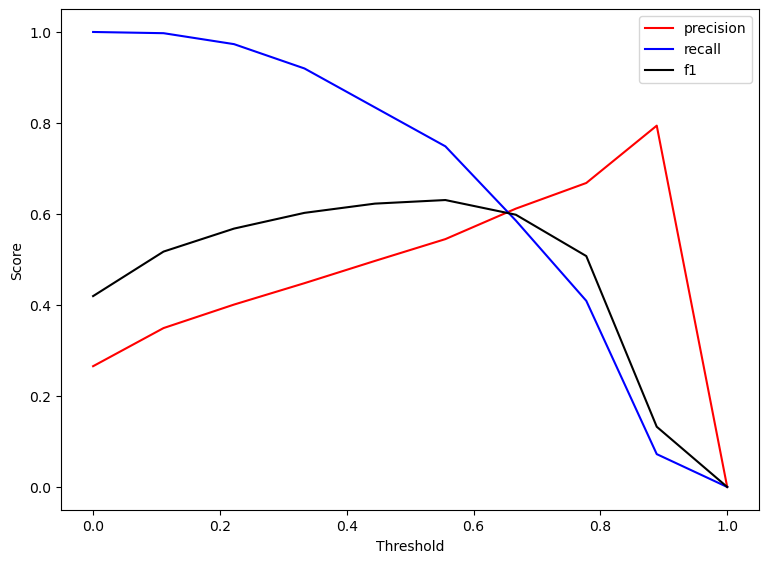

In [175]:
model = LogisticRegression(class_weight = 'balanced',random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred=model.predict(X_test)
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

thresholds = np.linspace(0, 1, 10)
precisions = []
recalls = []
f1s = []
ave = "binary"

for cut in thresholds:
    y_test_predic = (y_test_proba[:, 1] > cut).astype(int)
    precisions.append(precision_score(y_test, y_test_predic, average=ave))
    recalls.append(recall_score(y_test, y_test_predic, average=ave))
    f1s.append(f1_score(y_test, y_test_predic, average=ave))

plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

#### In our case, we prefer recall more than precision, so we manually set the threshold to 0.4, and update the model comparison table.

In [176]:
custom_threshold = 0.6

y_pred_prob_train = model.predict_proba(X_train)[:, 1]
y_pred_prob_test = model.predict_proba(X_test)[:, 1]


# Convert probabilities to binary predictions based on the custom threshold
y_pred_custom_train = (y_pred_prob_train >= custom_threshold).astype(int)
y_pred_custom_test = (y_pred_prob_test >= custom_threshold).astype(int)

accuracy_train = accuracy_score(y_train, y_pred_custom_train)
precision_train = precision_score(y_train, y_pred_custom_train)
recall_train = recall_score(y_train, y_pred_custom_train)
f1_train = f1_score(y_train, y_pred_custom_train)
roc_auc_train = roc_auc_score(y_train, y_pred_custom_train)


print(f"Accuracy_train: {accuracy_train:.3f}")
print(f"Precision_train: {precision_train:.3f}")
print(f"Recall_train: {recall_train:.3f}")
print(f"F1_train: {f1_train:.3f}")
print(f"roc_auc_train: {roc_auc_train:.3f}")

accuracy_test = accuracy_score(y_test, y_pred_custom_test)
precision_test = precision_score(y_test, y_pred_custom_test)
recall_test = recall_score(y_test, y_pred_custom_test)
f1_test = f1_score(y_test, y_pred_custom_test)
roc_auc_test = roc_auc_score(y_test, y_pred_custom_test)

print(f"Accuracy_test: {accuracy_test:.3f}")
print(f"Precision_test: {precision_test:.3f}")
print(f"Recall_test: {recall_test:.3f}")
print(f"F1_test: {f1_test:.3f}")
print(f"roc_auc_test: {roc_auc_test:.3f}")

Accuracy_train: 0.781
Precision_train: 0.571
Recall_train: 0.704
F1_train: 0.631
roc_auc_train: 0.756
Accuracy_test: 0.783
Precision_test: 0.576
Recall_test: 0.693
F1_test: 0.629
roc_auc_test: 0.754


In [177]:
models_weighted_compare1_lg = models_weighted_compare1.copy()
models_weighted_compare1_lg.loc['LogisticRegression',:]=[round(accuracy_train,3),round(accuracy_test,3),
                                                round(recall_train,3),round(recall_test,3),
                                                round(precision_train,3),round(precision_test,3),
                                                round(f1_train,3),round(f1_test,3),
                                                round(roc_auc_train,3),round(roc_auc_test,3),
                                                'custom_threshold=0.4']

models_weighted_compare1_lg

,Train_accuracy,Test_accuracy,Train_precision,Test_precision,Train_recall,Test_recall,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.781,0.783,0.704,0.693,0.571,0.576,0.631,0.629,0.756,0.754,custom_threshold=0.4
DecisionTree,0.750,0.742,0.518,0.509,0.823,0.794,0.636,0.620,0.773,0.758,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s..."
RandomForest,0.751,0.744,0.520,0.512,0.797,0.786,0.630,0.620,0.766,0.758,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s..."
GradientBoosting,0.739,0.745,0.505,0.513,0.816,0.821,0.624,0.631,0.764,0.769,"{'learning_rate': 0.01, 'n_estimators': 100}"
XGBoost,0.729,0.730,0.494,0.494,0.793,0.773,0.608,0.603,0.750,0.743,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est..."
SVC,0.700,0.704,0.464,0.468,0.833,0.832,0.596,0.599,0.742,0.745,"{'C': 1, 'gamma': 0.01}"


### 5.3.2 Method 2 - Use SMOTE-ENN for data balancing¶ (Resample train dataset only)

In [180]:
!conda install -c conda-forge imbalanced-learn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.12.4    |     pyhd8ed1ab_0         155 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         155 KB

The following packages will be UPDATED:

  imbalanced-learn                      0.12.3-pyhd8ed1ab_0 --> 0.12.4-pyhd8ed1ab_0 None




imbalanced-learn-0.1 | 155 KB    |            |   0% 
imbalanced-learn-0.1 | 155 KB    | #          |  10% 
imbalanced-learn-0.1 | 155 KB    | ##         |  21% 
imbalanced-learn-0.1 | 155 KB    | ####1      |  41% 
imbalanced-learn-0.1 | 155 KB    | ######1    |  62% 
imbalanced-learn-0.1 | 155 KB    | #########2 |  93% 
imbalanced-learn-0.1 | 155 KB    | ######



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [181]:
from imblearn.combine import SMOTEENN

In [182]:
sm=SMOTEENN()
X_resampled, y_resampled=sm.fit_resample(X,y)

In [183]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [187]:
model_params = {
    
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {}  
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },

    
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 4, 8],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },


    'XGBoost': {
        'model': XGBClassifier(objective='binary:logistic',random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1,0.2]
        }
    },
    
    'SVC': {
        'model': SVC(random_state=42),
        'params':{
            'C':[0.5,1,100],
            'gamma':['scale',1,0.1,0.01,0.001]   
        }
    }
}

results_SMOTEENN = []

# Loop through the models and perform grid search


for model_name, mp in model_params.items():

    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='recall')
    grid_search.fit(X_resampled, y_resampled)

    best_model = grid_search.best_estimator_

    yr_train_pred = best_model.predict(X_resampled)
    train_acc = round(accuracy_score(y_resampled, yr_train_pred),3)
    train_pre = round(precision_score(y_resampled, yr_train_pred),3)
    train_recall = round(recall_score(y_resampled, yr_train_pred),3)
    train_f1 = round(f1_score(y_resampled, yr_train_pred),3)
    train_roc_auc = round(roc_auc_score(y_resampled, yr_train_pred),3)

    y_test_pred = best_model.predict(X_test)
    test_acc = round(accuracy_score(y_test, y_test_pred),3)
    test_pre = round(precision_score(y_test, y_test_pred),3)
    test_recall = round(recall_score(y_test, y_test_pred),3)
    test_f1 = round(f1_score(y_test, y_test_pred),3)
    test_roc_auc = round(roc_auc_score(y_test, y_test_pred),3)
    
    results_SMOTEENN.append({
        'Model': model_name,
        'Train_accuracy': train_acc,
        'Test_accuracy': test_acc,
        'Train_precision': train_pre,
        'Test_precision': test_pre,
        'Train_recall': train_recall,
        'Test_recall': test_recall,
        'Train_f1': train_f1,
        'Test_f1': test_f1,
        'Train_roc_auc': train_roc_auc,
        'Test_roc_auc': test_roc_auc,
        'Best_Parameters': grid_search.best_params_,       
    })


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [188]:
models_compare_SMOTEENN = pd.DataFrame(results_SMOTEENN).set_index('Model')
models_compare_SMOTEENN.index.names = [None]
models_compare_SMOTEENN

,Train_accuracy,Test_accuracy,Train_precision,Test_precision,Train_recall,Test_recall,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.928,0.736,0.935,0.502,0.934,0.821,0.934,0.623,0.927,0.763,{}
DecisionTree,1.000,0.794,1.000,0.576,1.000,0.853,1.000,0.688,1.000,0.813,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
RandomForest,1.000,0.784,1.000,0.558,1.000,0.901,1.000,0.689,1.000,0.822,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
GradientBoosting,1.000,0.795,1.000,0.575,1.000,0.869,1.000,0.692,1.000,0.819,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
XGBoost,1.000,0.793,1.000,0.573,1.000,0.866,1.000,0.690,1.000,0.817,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
SVC,0.993,0.779,0.996,0.553,0.991,0.864,0.994,0.674,0.993,0.806,"{'C': 100, 'gamma': 0.1}"


In [189]:
model = RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=50,random_state=2023)
model.fit(Xr_train,yr_train)
importances = model.feature_importances_

From the results, SMOTEENN improves the models' performance greatly! Most of the models get the recall more than 0.95. However, overfitting is significant after the SMOTEENN resampling.

### 5.3.3Tune SMOTEENN

#### We try to tune SMOTEENN by changing resampling strategies in order to fix the overfitting problem.

In [190]:
y_train.value_counts()

0    4139
1    1495
Name: Churn, dtype: int64

In [191]:
ratios = [0.6,0.7,0.8,0.9,1,'minority','all','not minority']
# ratio = N_rm/N_M where N_rm is the number of samples in the minority class after resampling 
# and N_M is the number of samples in the majority class.

for ratio in ratios:
    sm=SMOTEENN(sampling_strategy=ratio,random_state=42)
    X_resampled, y_resampled=sm.fit_resample(X_train,y_train)
    print('ratio={}: \n {}, \n class1 in total:{:.2f}%'.format(ratio,y_resampled.value_counts(),
        y_resampled.value_counts()[1]/len(y_resampled)))

ratio=0.6: 
 0    2309
1    1086
Name: Churn, dtype: int64, 
 class1 in total:0.32%
ratio=0.7: 
 0    2284
1    1488
Name: Churn, dtype: int64, 
 class1 in total:0.39%
ratio=0.8: 
 0    2259
1    1856
Name: Churn, dtype: int64, 
 class1 in total:0.45%
ratio=0.9: 
 1    2314
0    2243
Name: Churn, dtype: int64, 
 class1 in total:0.51%
ratio=1: 
 1    2721
0    2199
Name: Churn, dtype: int64, 
 class1 in total:0.55%
ratio=minority: 
 1    2721
0    2199
Name: Churn, dtype: int64, 
 class1 in total:0.55%
ratio=all: 
 1    2721
0    2199
Name: Churn, dtype: int64, 
 class1 in total:0.55%
ratio=not minority: 
 0    2429
1     238
Name: Churn, dtype: int64, 
 class1 in total:0.09%


In [211]:
results_tuneSMOTE=[]

for ratio in ratios:
    sm=SMOTEENN(sampling_strategy=ratio,random_state=42)
    X_resampled, y_resampled=sm.fit_resample(X_train,y_train)
    
    model = RandomForestClassifier(min_samples_split=2,min_samples_leaf = 1, n_estimators=100,random_state=42)
    model.fit(X_resampled,y_resampled)

#    best_model = grid_search.best_estimator_

    yr_train_pred = model.predict(X_resampled)
    train_acc = round(accuracy_score(y_resampled, yr_train_pred),3)
    train_pre = round(precision_score(y_resampled, yr_train_pred),3)
    train_recall = round(recall_score(y_resampled, yr_train_pred),3)
    train_f1 = round(f1_score(y_resampled, yr_train_pred),3)
    train_roc_auc = round(roc_auc_score(y_resampled, yr_train_pred),3)

    y_test_pred = best_model.predict(X_test)
    test_acc = round(accuracy_score(y_test, y_test_pred),3)
    test_pre = round(precision_score(y_test, y_test_pred),3)
    test_recall = round(recall_score(y_test, y_test_pred),3)
    test_f1 = round(f1_score(y_test, y_test_pred),3)
    test_roc_auc = round(roc_auc_score(y_test, y_test_pred),3)
    
    results_tuneSMOTE.append({
            'Train_accuracy': train_acc,
            'Test_accuracy': test_acc,
            'Train_precision': train_pre,
            'Test_precision': test_pre,
            'Train_recall': train_recall,
            'Test_recall': test_recall,
            'Train_f1': train_f1,
            'Test_f1': test_f1,
            'Train_roc_auc': train_roc_auc,
            'Test_roc_auc': test_roc_auc,
    #        'Best_Parameters': grid_search.best_params_,   
    })

In [212]:
tuneSMOTE= pd.DataFrame(results_tuneSMOTE)
tuneSMOTE['Sample_Strategies']=ratios
tuneSMOTE= tuneSMOTE.set_index('Sample_Strategies')
tuneSMOTE

,Train_accuracy,Test_accuracy,Train_precision,Test_precision,Train_recall,Test_recall,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc
Sample_Strategies,,,,,,,,,,
0.6,1.0,0.779,1.0,0.553,1.0,0.864,1.0,0.674,1.0,0.806
0.7,1.0,0.779,1.0,0.553,1.0,0.864,1.0,0.674,1.0,0.806
0.8,1.0,0.779,1.0,0.553,1.0,0.864,1.0,0.674,1.0,0.806
0.9,1.0,0.779,1.0,0.553,1.0,0.864,1.0,0.674,1.0,0.806
1,1.0,0.779,1.0,0.553,1.0,0.864,1.0,0.674,1.0,0.806
minority,1.0,0.779,1.0,0.553,1.0,0.864,1.0,0.674,1.0,0.806
all,1.0,0.779,1.0,0.553,1.0,0.864,1.0,0.674,1.0,0.806
not minority,1.0,0.779,1.0,0.553,1.0,0.864,1.0,0.674,1.0,0.806


### Result: Even different resample strategies result in some changes in model performances, the overfitting still existing, therefore, we decide not to use SMOTE-ENN as the imbalanced technique in our case.

### Summary table of test ROC-AUC

In [221]:
model_summary = pd.DataFrame()
#model_summary.index = models_default.index
model_summary['Default Setting'] = models_default_compare['Test_roc_auc']
model_summary['Hyperparameter Tuned'] = models_tunePara_compare['Test_roc_auc']
model_summary['Class Balanced'] = models_weighted_compare1['Test_roc_auc']
model_summary['SMOTEENN'] = models_compare_SMOTEENN['Test_roc_auc']
model_summary

,Default Setting,Hyperparameter Tuned,Class Balanced,SMOTEENN
LogisticRegression,0.693,0.693,0.771,0.763
DecisionTree,0.657,0.671,0.758,0.813
RandomForest,0.687,0.689,0.758,0.822
GradientBoosting,0.700,0.700,0.769,0.819
XGBoost,0.684,0.687,0.743,0.817
SVC,0.679,0.683,0.745,0.806


## 6. Feature Importance Analysis (Use RandomForest to see Feature importance)

### 6.1. Imbalanced model

In [227]:
models_tunePara_compare.loc['RandomForest','Best_Parameters']

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [228]:
model = RandomForestClassifier(min_samples_split=2,min_samples_leaf=1, n_estimators=100,max_depth=10,random_state=2023)
model.fit(X_train,y_train)
importances = model.feature_importances_

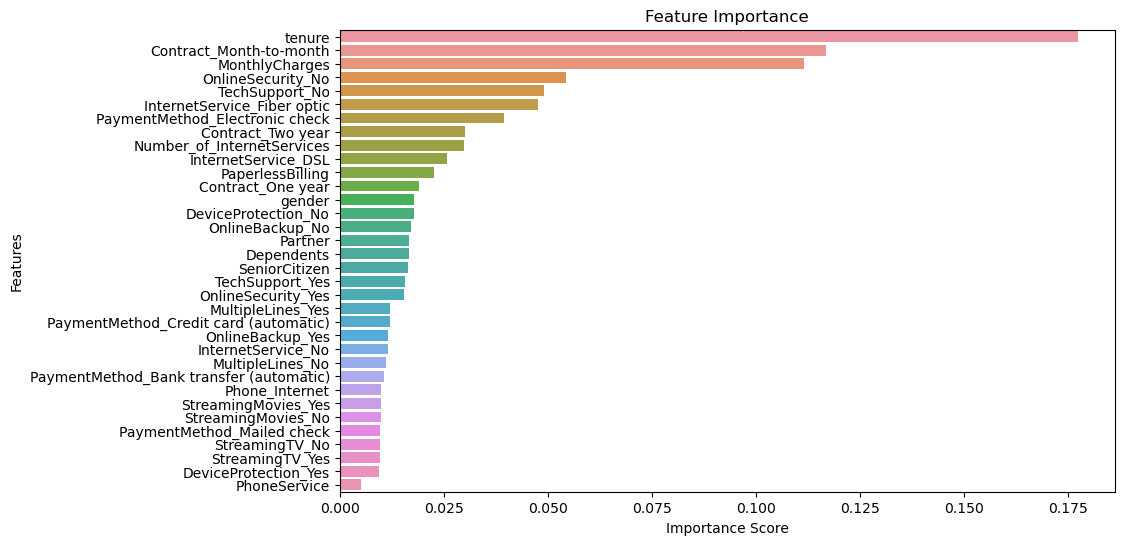

In [229]:
feature_importance_RF = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame to make it easier to visualize
feature_importance_RF = feature_importance_RF.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_RF)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [230]:
top10 = list(feature_importance_RF[:10].Feature.values)
top10

['tenure',
 'Contract_Month-to-month',
 'MonthlyCharges',
 'OnlineSecurity_No',
 'TechSupport_No',
 'InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'Contract_Two year',
 'Number_of_InternetServices',
 'InternetService_DSL']

### 6.2 Hyperparameter ('class-weight'=balanced) model¶

In [231]:
models_weighted_compare1.loc['RandomForest','Best_Parameters']

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 10}

In [232]:
model = RandomForestClassifier(min_samples_split=2,min_samples_leaf=5, n_estimators=100,max_depth=5,
                               class_weight='balanced',random_state=2023)
model.fit(X_train,y_train)
importances = model.feature_importances_

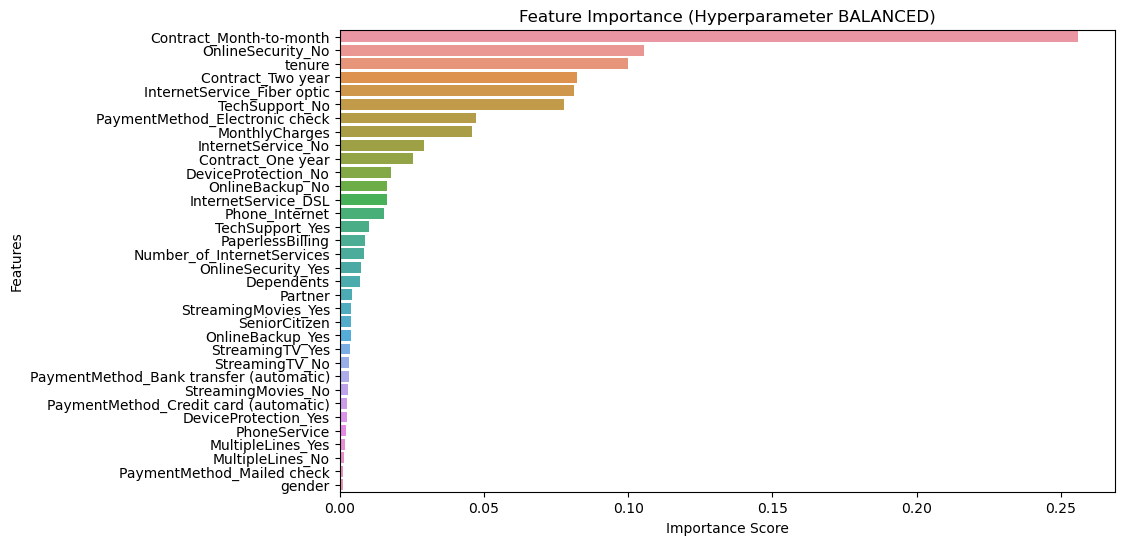

In [233]:
feature_importance_RF = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame to make it easier to visualize
feature_importance_RF = feature_importance_RF.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_RF)
plt.title('Feature Importance (Hyperparameter BALANCED)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [234]:
top10 = list(feature_importance_RF[:10].Feature.values)
top10

['Contract_Month-to-month',
 'OnlineSecurity_No',
 'tenure',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'TechSupport_No',
 'PaymentMethod_Electronic check',
 'MonthlyCharges',
 'InternetService_No',
 'Contract_One year']

### 6.3 SMOTE-ENN balanced model¶

In [235]:
models_compare_SMOTEENN.loc['RandomForest','Best_Parameters']

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [236]:
model = RandomForestClassifier(min_samples_split=2,min_samples_leaf = 1, n_estimators=100,random_state=2023)
model.fit(X_resampled,y_resampled)
importances = model.feature_importances_

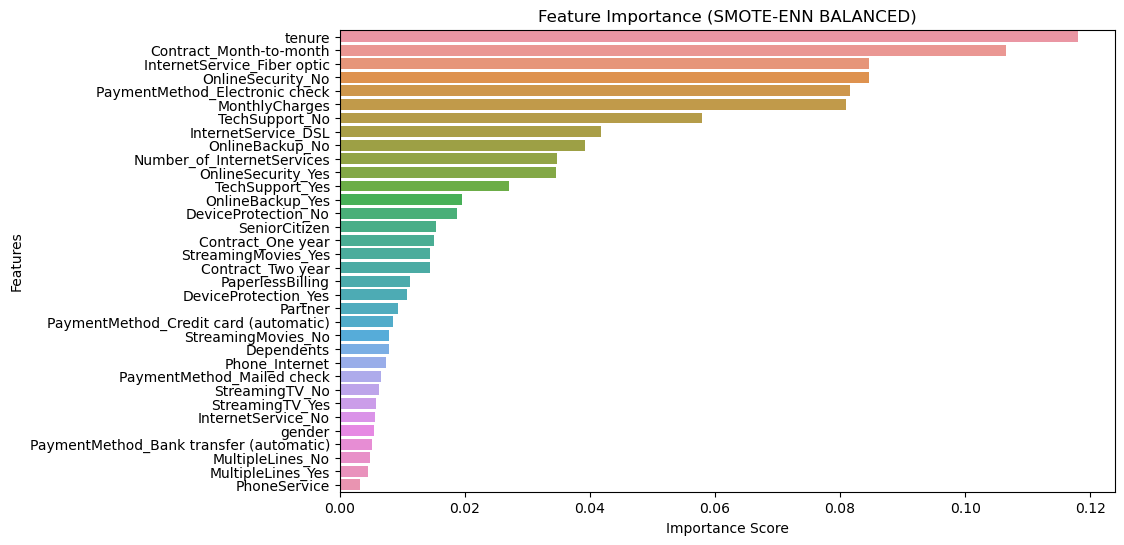

In [237]:
feature_importance_RF = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': importances})

# Sort the DataFrame to make it easier to visualize
feature_importance_RF = feature_importance_RF.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_RF)
plt.title('Feature Importance (SMOTE-ENN BALANCED)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [238]:
top10 = list(feature_importance_RF[:10].Feature.values)
top10

['tenure',
 'Contract_Month-to-month',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'PaymentMethod_Electronic check',
 'MonthlyCharges',
 'TechSupport_No',
 'InternetService_DSL',
 'OnlineBackup_No',
 'Number_of_InternetServices']

### 6.4 Use top 10 important features to retrain the models and compare
(hyperparameter 'claass_weight'=balanced)

In [239]:
X_train_top10 = X_train[top10]
X_test_top10 = X_test[top10]

In [242]:
pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1]
# Set the weights of the class 0 and class 1, this value is used for GradientBoosting and XGB

model_params = {
    
    'LogisticRegression': {
        'model': LogisticRegression(class_weight='balanced',random_state=42),
        'params': {}  
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier(class_weight='balanced',random_state=42),
        'params': {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced',random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 4, 8],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },


    'XGBoost': {
        'model': XGBClassifier(objective='binary:logistic',scale_pos_weight=pos_weight,random_state=42),
        'params': {
            'n_estimators': [25, 50, 100, 200],
            'max_depth': [2, 3, 5, 7],
            'learning_rate': [0.01, 0.1,0.2]
        }
    },
    
    'SVC': {
        'model': SVC(class_weight='balanced',random_state=42),
        'params':{
            'C':[0.5,1,100],
            'gamma':['scale',1,0.1,0.01,0.001]   
        }
    }
}

results_weighted_top10 = []

# Loop through the models and perform grid search


for model_name, mp in model_params.items():

    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='recall')
    
    if model_name == 'GradientBoosting':
        sample_weight = np.array([pos_weight if i == 1 else 1 for i in y_train])
        grid_search.fit(X_train_top10, y_train, sample_weight=sample_weight)
#     Special case for model GradientBoosting, it requires setting sampele_weight in fitting

    else:
        grid_search.fit(X_train_top10, y_train)

        
    best_model = grid_search.best_estimator_
#     The best model is the model with the best parameters setting

    y_train_pred = best_model.predict(X_train_top10)
    train_acc = round(accuracy_score(y_train, y_train_pred),3)
    train_pre = round(precision_score(y_train, y_train_pred),3)
    train_recall = round(recall_score(y_train, y_train_pred),3)
    train_f1 = round(f1_score(y_train, y_train_pred),3)
    train_roc_auc = round(roc_auc_score(y_train, y_train_pred),3)

    y_test_pred = best_model.predict(X_test_top10)
    test_acc = round(accuracy_score(y_test, y_test_pred),3)
    test_pre = round(precision_score(y_test, y_test_pred),3)
    test_recall = round(recall_score(y_test, y_test_pred),3)
    test_f1 = round(f1_score(y_test, y_test_pred),3)
    test_roc_auc = round(roc_auc_score(y_test, y_test_pred),3)
    
    results_weighted_top10.append({
        'Model': model_name,
        'Train_accuracy': train_acc,
        'Test_accuracy': test_acc,
        'Train_precision': train_pre,
        'Test_precision': test_pre,
        'Train_recall': train_recall,
        'Test_recall': test_recall,
        'Train_f1': train_f1,
        'Test_f1': test_f1,
        'Train_roc_auc': train_roc_auc,
        'Test_roc_auc': test_roc_auc,
        'Best_Parameters': grid_search.best_params_,        
    })


In [243]:
models_weighted_top10 = pd.DataFrame(results_weighted_top10).set_index('Model')
models_weighted_top10.index.names = [None]

models_weighted_top10

,Train_accuracy,Test_accuracy,Train_precision,Test_precision,Train_recall,Test_recall,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.752,0.754,0.521,0.525,0.793,0.791,0.629,0.631,0.765,0.766,{}
DecisionTree,0.775,0.774,0.556,0.557,0.753,0.733,0.639,0.633,0.768,0.761,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s..."
RandomForest,0.763,0.752,0.536,0.522,0.788,0.770,0.638,0.622,0.771,0.757,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s..."
GradientBoosting,0.738,0.744,0.504,0.512,0.816,0.821,0.623,0.630,0.763,0.769,"{'learning_rate': 0.01, 'n_estimators': 100}"
XGBoost,0.726,0.728,0.490,0.493,0.807,0.802,0.610,0.610,0.752,0.752,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est..."
SVC,0.700,0.704,0.464,0.468,0.833,0.832,0.596,0.599,0.742,0.745,"{'C': 100, 'gamma': 0.001}"


In [244]:
models_weighted_top10.loc['RandomForest','Best_Parameters']

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 50}

In [245]:
model = RandomForestClassifier(min_samples_split=4,min_samples_leaf=1, n_estimators=10,max_depth=5,
                               class_weight='balanced',random_state=2023)
model.fit(X_train_top10,y_train)
importances = model.feature_importances_

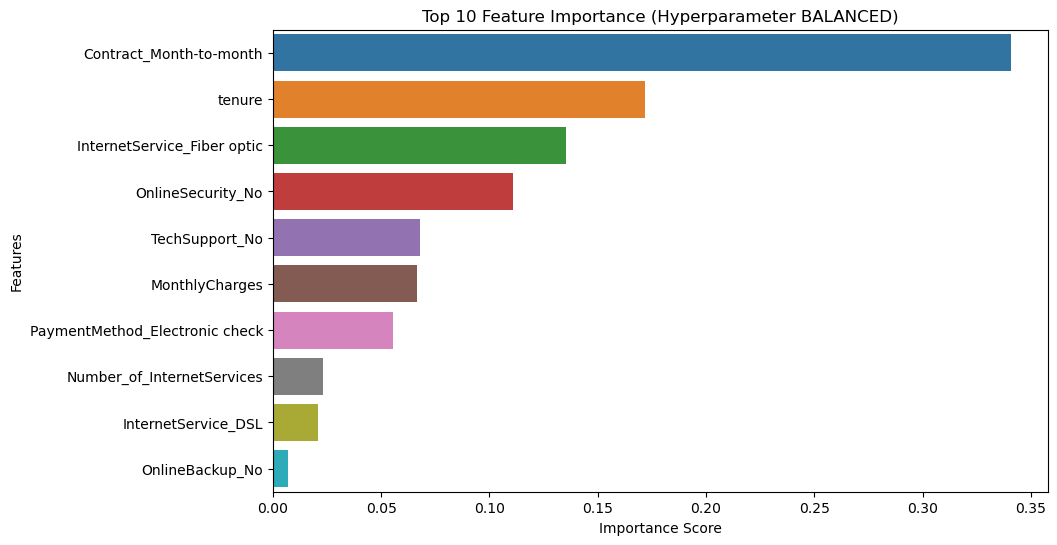

In [246]:
feature_importance_RF = pd.DataFrame({'Feature': X_train_top10.columns, 'Importance': importances})

# Sort the DataFrame to make it easier to visualize
feature_importance_RF = feature_importance_RF.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_RF)
plt.title('Top 10 Feature Importance (Hyperparameter BALANCED)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()